In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as plt
import seaborn
import jieba
import re
from wordcloud import WordCloud

In [2]:
plt.rc('figure', figsize=(15, 8))
seaborn.set()

In [3]:
data = pd.read_csv('weibo.csv',encoding='gbk')

首先看看数据长什么样。
爬下来的微博数据包含下面几个列:
- weibo_content   微博内容
- weibo_place    微博签到地址
- publish_time   微博发送时间
- publish_tool   微博设备客户端
- up_num       点赞数
- retweet_num    转发数
- comment_num    评论数

In [4]:
data.head()

,id,weibo_content,weibo_place,publish_time,publish_tool,up_num,retweet_num,comment_num
0,0,转发理由:高玉倩老师千古！[祈祷][祈祷][祈祷][泪][泪][泪]\n原始用户: 贾怀胤\...,无,2018-12-23 11:46,iPhone 7 Plus,4008,209,316
1,1,百花齐放，独树一帜！[good][握手][耶]@书与画收藏,无,2018-12-24 08:31,iPhone 7 Plus,834,50,54
2,2,转发理由:[good][握手][耶]\n原始用户: 微博艺术\n转发内容: #遇见艺术##V...,无,2018-12-23 20:30,iPhone 7 Plus,1528,72,120
3,3,上午在大杭州冒着霏霏细雨拜谒“盖叫天故居”[祈祷]幸会我国京剧艺术大师盖叫天先生之孙、京剧表...,无,2018-12-22 13:01,iPhone 7 Plus,3146,98,233
4,4,今天下午央视版 @西游记摄像师王崇秋 老师的新书《1982版西游记拍摄档案》在济南的新华·爱...,无,2018-12-22 10:00,iPhone 7 Plus,2620,170,173


### 设备分析

In [5]:
devices = data.publish_tool.value_counts()
print(devices[:20])

iPhone 6 Plus    1038
微博 weibo.com      904
iPhone 7 Plus     716
360安全浏览器          714
iPhone客户端         430
iPhone 5s         345
iPhone            205
搜狗高速浏览器           115
分享按钮              100
百度分享               87
新浪博客               49
bShare分享           25
秒拍网页版              22
无                  21
优酷土豆               20
腾讯视频               20
JiaThis分享按钮        19
中新网微博              19
微博搜索               17
网易娱乐               17
Name: publish_tool, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BA3F9E8>],
      dtype=object)

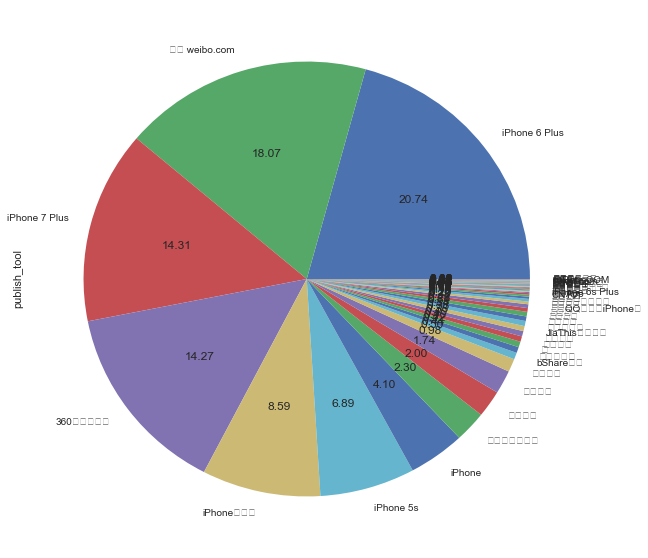

In [6]:
devices.abs().plot.pie(subplots=True, figsize=(10, 10), autopct="%.2f")

### 点赞数

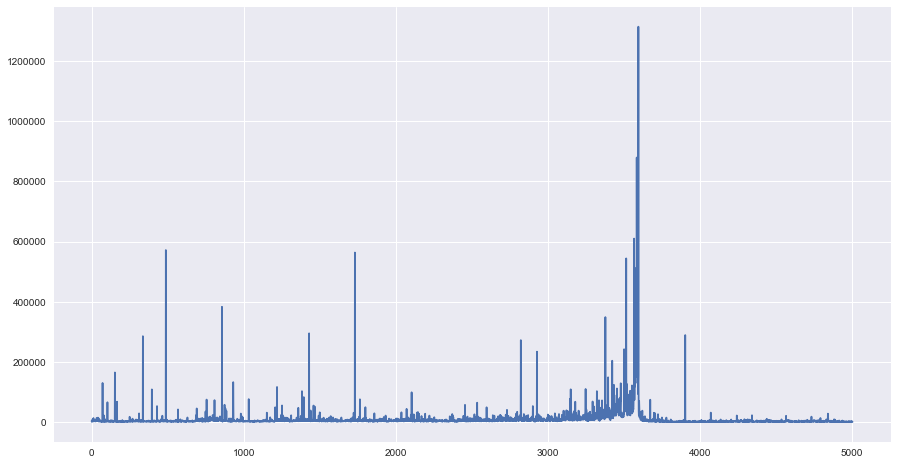

In [7]:
plt.plot([i for i in range(len(data.up_num))],data.up_num)
plt.show()

In [8]:
data[data.up_num > 600000]

,id,weibo_content,weibo_place,publish_time,publish_tool,up_num,retweet_num,comment_num
3567,3567,我最亲爱的父亲，您离开我们已经整整两年了，思念甚浓，衷心祝愿您天天有绍剧猴戏陪伴朝夕，我们永...,无,2016-01-31 12:42,iPhone 5s,610105,14534,26029
3584,3584,“齐天大圣”与大家一起共贺猴年吉祥、国泰民安！照片摄于昨天下午录制央视戏曲春节联欢晚会化妆间。,无,2016-01-27 14:23,微博 weibo.com,879613,49472,58125
3591,3591,今天下午参加了中央电视台春节戏曲晚会《金猴迎春》节目的排练与录制，我发布排练及化好妆的微博后...,无,2016-01-26 20:21,微博 weibo.com,759417,28872,36439
3595,3595,已化好妆准备录制。,无,2016-01-26 13:44,iPhone 5s,1314806,202708,127685


### 转发数

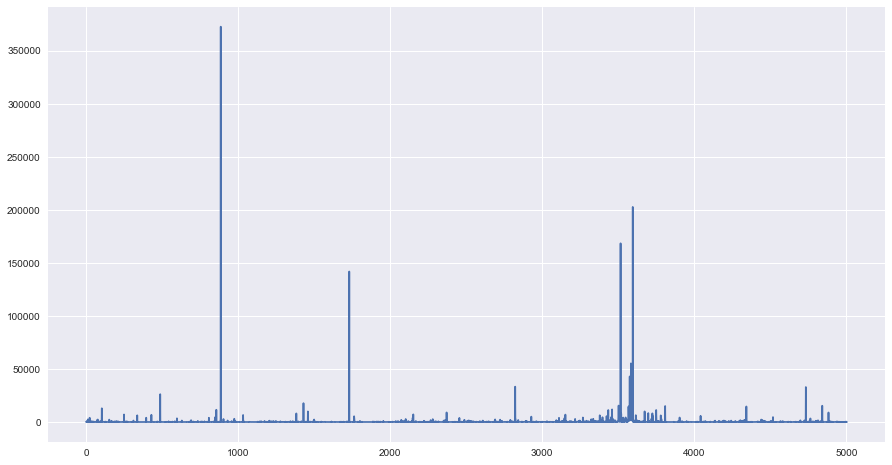

In [9]:
plt.plot([i for i in range(len(data.retweet_num))],data.retweet_num)
plt.show()

In [10]:
data[data.retweet_num > 150000]

,id,weibo_content,weibo_place,publish_time,publish_tool,up_num,retweet_num,comment_num
886,886,转发理由:[good][耶][握手]\n原始用户: TFBOYS-王源\n转发内容: 俺老孙...,无,2018-01-23 11:52,iPhone客户端,37365,372610,4826
3515,3515,送给大家的祝福。 秒拍视频 .,无,2016-02-07 08:21,秒拍网页版,544198,168426,33680
3595,3595,已化好妆准备录制。,无,2016-01-26 13:44,iPhone 5s,1314806,202708,127685


### 评论数

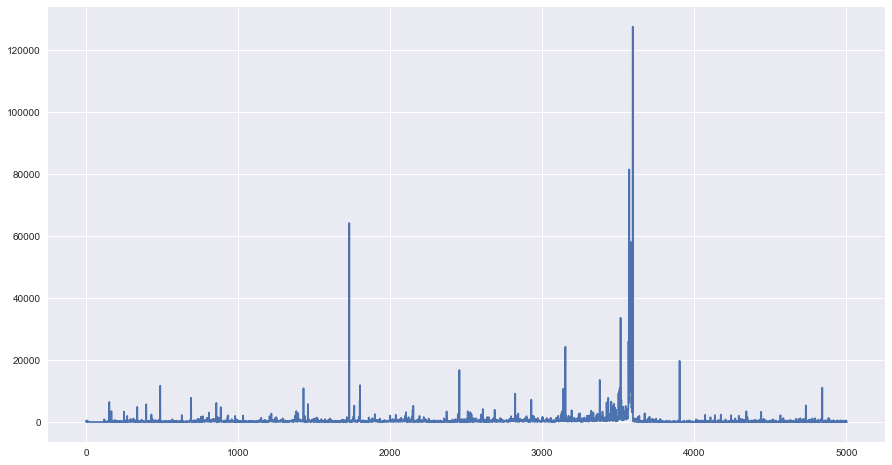

In [11]:
plt.plot([i for i in range(len(data.comment_num))],data.comment_num)
plt.show()

In [12]:
data[data.comment_num > 60000]

,id,weibo_content,weibo_place,publish_time,publish_tool,up_num,retweet_num,comment_num
1731,1731,从迟重瑞先生处惊悉我国第一代电视女导演、尊敬的杨洁导演去世的噩耗，异常悲痛，这是中国电视剧的...,无,2017-04-17 10:51,iPhone 6 Plus,563711,141847,64251
3572,3572,衷心希望大家继续支持关注 @央视春晚 并预祝成功直播，感谢媒体、网民对国粹猴戏艺术的支持，晚安！,无,2016-01-29 00:04,微博 weibo.com,512651,15031,81592
3595,3595,已化好妆准备录制。,无,2016-01-26 13:44,iPhone 5s,1314806,202708,127685


### 签到信息

In [13]:
data.weibo_place.value_counts()

无                      5001
http://t.cn/z8WGAKG       2
北京·潘家园旧货市场                1
Name: weibo_place, dtype: int64

### 微博内容

In [14]:
def extract_emoji(weibo):
    pattern = re.compile(r'[\[](.*?)[\]]', re.S)
    return re.findall(pattern, weibo)

def extract_at(weibo):
    pattern = re.compile(r'[@](.*?)[\s]', re.S)
    return re.findall(pattern, weibo)

In [15]:
emoji_list = []
for item in data.weibo_content:
    emoji_list.extend(extract_emoji(item))

In [16]:
at_list = []
for item in data.weibo_content:
    at_list.extend(extract_at(item))

In [17]:
from collections import Counter
def statistic_top(lst,top=100):

    result= dict(Counter(lst))
    sortlist=sorted(result.items(),key=lambda item:item[1],reverse=True)
    resultlist=[]
    for i in range(0,top):
        resultlist.append(sortlist[i])
    return sortlist,resultlist

#### 最爱使用的表情

In [18]:
emojis,top20_emoji = statistic_top(emoji_list,20)

In [19]:
print(top20_emoji)

[('祈祷', 2600), ('作揖', 1667), ('握手', 1411), ('good', 1047), ('耶', 1020), ('嘻嘻', 409), ('呲牙', 275), ('泪', 173), ('蜡烛', 128), ('心', 73), ('拳头', 59), ('ok', 48), ('蛋糕', 46), ('微笑', 39), ('赞', 33), ('偷笑', 32), ('鲜花', 30), ('猴子', 28), ('强壮', 27), ('爱你', 23)]


#### 最多@微博用户

In [20]:
ats,top20_at = statistic_top(at_list,20)

In [21]:
print(top20_at)

[('六小龄童', 520), ('儒意影业', 334), ('贰零壹陆影视传媒', 318), ('行走的禅文化', 270), ('一品行的微博', 265), ('光影先生1981', 168), ('六小龄童图书签名店', 110), ('酒至文亦来', 93), ('马德华', 85), ('人民网', 83), ('长江文艺出版社', 81), ('迟重瑞--人生只做一事又何妨', 55), ('沙和尚刘大刚', 46), ('六小龄童艺术馆', 42), ('中国新闻网', 39), ('北京杜莎夫人蜡像馆', 38), ('董董Dora', 36), ('北京长江新世纪', 35), ('汪粤_', 35), ('唐继全西游记博客', 35)]


#### 六老师曾经传道授业过的学校

In [22]:
university = dict()
for item in at_list:
    if '大学' in item or '学院' in item:
        if item in university:
            university[item] += 1
        else:
            university[item] = 1
sorted(university.items(), key=lambda d: d[1],reverse=True) 

[('云南师范大学', 23),
 ('浙江大学', 11),
 ('中国政法大学', 8),
 ('清华大学', 8),
 ('西北工业大学', 7),
 ('延安大学', 7),
 ('北京大学人民医院', 6),
 ('延安大学团委', 6),
 ('麻省理工学院中国学生学者联合会', 5),
 ('辽宁大学', 4),
 ('广东外语外贸大学', 4),
 ('陕西中医药大学', 4),
 ('内蒙古师范大学鸿德学院学生会', 4),
 ('上海视觉艺术学院', 4),
 ('哈佛大学中国学联', 4),
 ('成都农业科技职业学院', 4),
 ('电子科技大学', 3),
 ('同济大学', 3),
 ('北京大学', 3),
 ('陕西师范大学', 3),
 ('成都大学', 3),
 ('四川旅游学院', 2),
 ('甘肃林业职业技术学院', 2),
 ('歌德学院中国', 2),
 ('西北农林科技大学', 2),
 ('暨南大学', 2),
 ('太原工业学院微博协会', 2),
 ('太原工业学院团委', 2),
 ('太原科技大学微博校园', 2),
 ('太原科技大学学生会', 2),
 ('中北大学青年新媒体中心', 2),
 ('北京外国语大学', 2),
 ('上海师范大学', 2),
 ('西安建筑科技大学华清学院', 2),
 ('成都理工大学', 2),
 ('西安理工大学', 2),
 ('苏州大学', 2),
 ('武汉传媒学院', 1),
 ('中国传媒大学校团委', 1),
 ('中国政法大学研究生会', 1),
 ('西北师范大学微博协会', 1),
 ('吉林动画学院', 1),
 ('吉林大学', 1),
 ('苏州科技大学', 1),
 ('成都职业技术学院', 1),
 ('辽宁石油化工大学团委', 1),
 ('暨南大学暨南人网', 1),
 ('暨南大学学生会', 1),
 ('东北大学', 1),
 ('武汉理工大学', 1),
 ('杭州电子科技大学', 1),
 ('中国人民大学', 1),
 ('山西大学学生会', 1),
 ('西安汽车科技职业学院', 1),
 ('西安思源学院', 1),
 ('西安文理学院', 1),
 ('咸阳师范学院', 1),
 ('中北大学', 1),
 ('中北大

In [23]:
stopwords=[line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8').readlines()]  

In [24]:
stopwords.extend([item[0] for item in emojis])

In [25]:
word_list = []
def seg_sentence(sentence):  
    sentence_seged = jieba.cut(sentence.strip())  
    outstr = ''  
    for word in sentence_seged:  
        if word not in stopwords:  
            if word != '\t' and word != '\n' and word != ' ':  
                outstr += word  
                outstr += " "  
                word_list.append(word)
    return outstr

In [26]:
for item in data.weibo_content:
    print(seg_sentence(item))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 2.328 seconds.
Prefix dict has been built succesfully.


高玉倩 老师 千古 贾怀胤 内容 著名 京剧 表演艺术家 梅兰芳 弟子 红灯记 李 奶奶 扮演者 高玉倩 老师 12 月 23 日 凌晨 2 47 仙逝 享年 92 岁 
百花齐放 独树一帜 书 画 收藏 
艺术 内容 遇见 艺术 ## V 影响力 峰会 2018 艺术 V 影响力 盛典 恭喜 六小龄童 文化 艺术 传播 大使 称号 感谢 文化 艺术 传播 做出 贡献 运营 总经理 陈福云为 颁奖 
上午 大 杭州 霏霏细雨 拜谒 盖叫天 故居 幸会 我国 京剧 艺术大师 盖叫天 之孙 京剧 表演艺术家 张善麟 南派 猴王 张翼鹏 之子 
今天下午 央视版 西游记 摄像师 王崇秋 老师 新书 1982 版 西游记 拍摄 档案 济南 新华 爱书客 新书 首发式 杭州 录制 节目 遥祝 首发式 圆满成功 祝王 崇秋 老师 健康 吉祥 
六小龄童 工作室 内容 今晚 六小龄童 应邀 特别 嘉宾 参加 杭州 浙江省委 宣传部 主办 2018 梦 浙江 网络 大赛 颁奖典礼 
喜闻 二 师弟 八戒 新年 即将 出版 首部 自传 悟 好 不 欢喜 两手 翻花 戏里 师兄弟 戏外 似 兄弟 荣幸 此书 作序 猴兄 猪弟 衷心希望 网友 多多 关注 支持 文体 百花齐放 马 德华 
感谢 观众 朋友 多年 支持 关注 感谢 刘国梁 孙杨 施一公 吳京 李书福 张瑞敏 嘉宾 发来 感谢 六小龄童 工作室 内容 昨晚 纪念 改革开放 40 周年 赢得 尊敬 主题 品牌 40 年 40 人 评选 颁奖 晚会 圆满 落下 帷幕 六小龄童 马云 张艺谋 林毅夫 郎平 刘晓庆 杨澜 许海峰 40 位 嘉宾 获奖 排名 不 分 第十二届 全国人大常委会 副委员长 陈昌智 联合国 前 副 秘书长 沙祖康 出席 活动 品牌 联盟 王永 
人民日报 内容 改革开放 40 周年 习近平 9 句 话 真 提气 收藏 学习 
六小龄童 工作室 内容 2018 年 丝路 凝聚力 盛典 今晚 六小龄童 上海 参加 2018 丝路 凝聚力 盛典 获颁 终身 成就 荣誉奖 丝路 凝聚力 盛典 
北京日报 客户端 内容 旧 时光 都 VR 版 时光 机 里 坐稳 穿越 都 聊 5G 还 记得 第一次 3G 上网冲浪 惊喜 记得 当年 刘翔 一句 亚洲 带来 感动 蛤蟆镜 小虎队 四大 天王 暑假 必不可少 热播 大剧

偶遇 苏州 街头 如意 金箍棒 
江苏省 苏州市 高新区 长江 小学校 师生 送给 绘画 作品 贰 零壹 陆 影视 传媒 儒意 影业 品行 行走 禅 文化 六小龄童 签名 店 
大白 六小龄童 感慨 维权 难 到处 都 徒弟 人 合影 
http t cn E7LmQkd 
应邀参加 今天上午 十时 中国现代文学馆 马识途 书法展 暨 马识途 文集 发布会 会上 105 岁 高寿 马 老 铁凝 女士 王蒙 欢聚 … … 
维护 合法权益 陈忱 山翁 内容 媒体 时代 更 文责自负 网络 媒体 时代 法外 北京市 影视娱乐 法学会 组织 人民 艺术家 法律 权益 保护 座谈会 中国政法大学 著名 表演艺术家 六小龄童 应邀参加 自已 亲身 经历 呼吁 全 社会 都 关注 支持 法律 准绳 权益 保护 举报 诬陷 别人 一张 邮票 信封 零 成本 动动手 指 编造 恶心 故事 网上 一发 齐 妥妥 杀伤力 苦 不知 找 说理 法治 国家 建设 不仅仅 艺术家 所有人 维权 方向 途径 定分 止争 促使 重视 文责自负 这一 名词 作家 专属 处在 网络 媒体 时代 明白 
1961 年 毛泽东 主席 国家 领导人 中南海怀仁堂 观看 父亲 六龄童 伯父 七龄童 二哥 小 六龄童 艺术家 演出 绍剧 舞台剧 孙悟空 三打 白骨精 七龄童 本剧 编剧 导演 同年 11 月 17 日 挥毫 写下 诗词 七律 郭沫若 同志 金猴 奋起 千钧 棒 玉宇 澄清 万里 埃 光辉 诗句 经典 绝唱 使 章氏 猴戏 绍剧 艺术 大放异彩 
今晚 中国政法大学 副 书记 副校长 常 保国 研究生院 师生 共 话 西游 … … 
中国政法大学 法律 武器 捍卫 正当权益 漏头 眉 
上午 接受 福建 专程 赶来 北京 录制 专访 媒体 摄制组 谈 南北 猴戏 表演 推荐 京剧 大闹天宫 剧中 四位 扮演 孙悟空 艺术形象 后起之秀 … … 
中国政法大学 研究生 会 今晚 不见不散 … … 中国政法大学 中国政法大学 研究生 会 讲座 预告 | 美猴王 要来 法大 
中国野生动物保护协会 文化 形象大使 北京 受邀 拍摄 首部 公益 宣传片 摄制组 全体 工作人员 辛苦 … … 
坐落 家乡 浙江 绍兴 上虞 百年 名校 被誉为 北有 南开 南有 春晖 浙江省 春晖 中学 上虞 春晖 中 学

原定 今天上午 8 时许 乘机 飞往 上海 参加 未来 之星 少儿 公益活动 恐 近几天 阵雨 天气 变化无常 昨晚 上 改订 今天上午 10 时 高铁 北京 南站 出发 得知 早上 航班 一切正常 飞机 已停 虹桥机场 人算不如 天算 坐 高铁 踏实 … … 
恭祝 内蒙古 少年报 越办 越 好 本报 文化 形象大使 深感 任重道远 … … 谢谢你们 本月 12 日 第三届 内蒙古自治区 文博会 上 赠送给 上海 六小龄童 艺术馆 皮件 纪念品 珍藏 展示 
戏里 最 严厉 师父 汪粤 _ 内容 私信 三位 师傅 合影 最 严励 师傅 念 紧箍咒 赶走 … … 戏 西游记 生活 中 好 兄弟 六小龄童 北京 大红门 
应 网民 朋友 发布 一组 三任 师父 汪粤 _ 徐少华 迟 重瑞 人生 只 做 一事 何妨 合影 
天气 原因 回 北京 航班 取消 回到 呼和浩特 内蒙古 新华书店 领导 出版社 非常重视 安排 住处 谢谢 关注 祝 晚安 
内蒙古 客户端 现场 齐天大圣 
天气 原因 关闭 首都机场 航班 高 空中 接到 地面 通知 先 返回 呼和浩特 机场 等待 这回 笑 八十一 小难 
延误 不顺 花卉 心情 陡然 豁朗 呼和浩特 机场 国航 马上 起飞 回家 国际航空 
36 年 别提 好 观众 才能 好剧 霸屏剧 经济账 西游记 重播 时 每集 价格 能达 数十万 
今天下午 二 时 行者 珍藏版 内蒙古 新华书店 面见 读者 接受 网易 独家 专访 各大 媒体 采访 … … 贰 零壹 陆 影视 传媒 儒意 影业 品行 行走 禅 文化 六小龄童 签名 店 长江文艺出版社 北京 长江 新世纪 
内蒙古自治区 宣传部 副 部长 王小平 第三届 文博会 上 颁发 自治区 阅读 文化 形象大使 奖牌 穿 上 红色 蒙古 盛装 行者 呼和浩特市 读者 朋友 见面会 成功 顺利 … … 贰 零壹 陆 影视 传媒 儒意 影业 行走 禅 文化 品行 六小龄童 签名 店 北京 长江 新世纪 全 
广州日报 撰文 世界 上 最 幸福 演员 世界 上 最 幸福 演员 
今天上午 九时许 广东省 东莞 图书馆 点映 纪录片 重走 玄奘 路 同名 书籍 广大读者 见面 广州白云机场 待飞 呼和浩特 贰 零壹 陆 影视 传媒 儒意 影业 品行 行走 禅 文化 六小龄童 签名 店 

父亲节 影视剧 中 塑造 一系列 父亲 形象 马雅 舒 _ yaya 李彩华 rainli 李彩桦 王宝强 笑傲江湖 李静儿 小演员 乐乐 http t cn RoAZqt6 
上海 电影节 尼古拉斯 凯奇 好莱坞 巨星 奥斯卡 影帝 上海 国际 电影节 六小龄童 秒 拍 
上海 电影节 21 届 上海 国际 电影节 上 奥地利 巨星 克里斯托弗 瓦尔 兹 留影 代表作 无耻 混蛋 解放 姜戈 曾 获 两届 奥斯卡 最佳 男配角 一届 戛纳 最佳 男演员 奖 上海 国际 电影节 
父亲节 恭祝 海内外 父亲 节日快乐 吉祥如意 
上海 电影节 姜文 辛苦 21 届 上海 国际 电影节 上海 国际 电影节 
上海 电影节 彭于 晏 上海 国际 电影节 
师徒 五人 参加 上海 国际 电影节 董董 Dora 汪粤 _ 马 德华 沙和尚 刘大刚 财迷 
财迷 剧组 相聚 上海 国际 电影节 董董 Dora 汪粤 _ 马 德华 沙和尚 刘大刚 财迷 传媒 第三只 眼 秒 拍 
相聚 上海 国际 电影节 汪粤 _ 内容 财迷 剧组 相聚 上海 董董 Dora 六小龄童 马 德华 沙和尚 刘大刚 财迷 
昨晚 没 看电视 播出 观众 请 收看 芒果 娱乐 内容 四大名著 主演 同框 86 版 西游记 87 版 红楼梦 94 版 三国演义 98 版 水浒传 主要演员 来到 纪念 电视剧 诞生 60 周年 盛典 六小龄童 孙悟空 马 德华 猪八戒 朱龙广 如来佛 祖 三位 主演 现场 重现 西游记 经典 片段 泪目 欧阳奋强 贾宝玉 邓婕 王熙凤 袁玫 袭人 现场 带来 红楼梦 片段 周野芒 林冲 臧金生 鲁智深 水浒传 角色 付出 很 感人 洪宇宙 周瑜 张光北 吕布 朗诵 三国演义 滚滚 长江 东 逝水 芒果 娱乐 芒果 娱乐 秒 拍 
上海 六小龄童 艺术馆 开馆 6 周年 馆庆日 6 年来 馆内 迎来 海内外 各界 游客 获 最 大规模 西游记 纪念品 收藏 英国 吉尼斯世界纪录 感谢 6 年 关注 支持 
长春 龙嘉 机场 等待 延误 三个 小时 航班 总算 听到 广播 登机 飞往 大 上海 明天 上海 国际 电影节 不见不散 贰 零壹 陆 影视 传媒 儒意 影业 行走 禅 文化 品行 
今天上午 历史 文化名城 长春 最具 规模 吉林 动画 学院 讲演 开讲 前 还 电

今天下午 专程 参观 座落在 上海市 嘉定区 原 浙江 画院 院长 国画 艺术大师 陆俨少 陆俨少 艺术院 沙孟海 题写 馆名 贰 零壹 陆 影视 传媒 儒意 影业 品行 行走 禅 文化 陆俨少 艺术院 上海 嘉定 嘉定 旅游 
新民晚报 新民 网 新 电视 诞生 60 周年 荧屏 精彩 打响 上海 文化 品牌 
光影 1981 内容 六爷 圆满完成 2018 上海 海湾 半程 马拉松赛 新 征程 走 六小龄童 上海 
演员 刘斌 阎青妤 国际 劳动节 忆 六小龄童 周末 恋爱 角 中 出演 建筑工人 
国际 劳动节 五一国际劳动节 恭祝 劳动者 观众 节日快乐 吉祥如意 
应邀出席 2018 上海 海湾 半程 马拉松赛 今天上午 七时许 奉贤区 隆重举行 座落在 海湾 国际 旅游 渡假 区 上海 六小龄童 艺术馆 内 接受 媒体 采访 全民 健身 … … 摄影 光影 1981 贰 零壹 陆 影视 传媒 儒意 影业 品行 行走 禅 文化 上海 奉贤 发布 上海 海湾 旅游 奉贤 门户网 官网 奉贤 文广 
澳大利亚 翻拍 西游记 孙悟空 肌肉男 唐僧 换成 尼姑 好好 唐僧 一言不合 女演员 演 许仙 找个 姑娘 话 说 新版 阵容 学了 日本 1978 版本 西游记 版本 中 饰演 孙悟空 一位 女性 夏目 雅子饰 此剧 居然 还 当年 澳大利亚 国家 大受欢迎 只 可惜 杨洁 西游记 还 没 问世 
上海 奉贤 海湾 半程 马拉松赛 明天 30 日 上午 不见不散 贰 零壹 陆 影视 传媒 儒意 影业 品行 行走 禅 文化 上海 奉贤 发布 上海 海湾 旅游 赶海 乐 大圣 再次 驾临 上海 海湾 半程 马拉松赛 快 去 吸 一口 仙气 
清华大学 107 周年 校庆 清华大学 107 周年 校庆 清华 正 芳华 学校 一员 清华大学 研究生 会 艺术 指导 顾问 深感 自豪 … … 恭祝 清华大学 107 岁 生日快乐 愿 归来 仍 少年 
武生 艺术家 杨秋利 多年 前 录制 中 绝技 令人惊叹 原因 改行 做 道具 设计 早知 大连 京剧院 工作 前天 会 沈阳 去 大连 看望 辽宁省 文化厅 文化 大连 大连 京剧院 宏济大 舞台 六小龄童 秒 拍 
今日 头条 辽宁 出版 集团 http t cn RuasQxZ 
合作 共赢 同创 辉煌 益生 健步 

出任 总 制片人 总导演 饰演 玄奘大师 纪录片 重走 玄奘 路 抢先 版 2 月 1 日 6 30 四川 卫视 2 月 2 日 6 52 陕西 卫视 2 月 3 日 7 44 青海 卫视 播出 电视台 陆续 播出 首播 时 观众 届时 请 安排 时间 收看 请 看过 后 提出 意见 建议 后续 拍摄 时 改进 贰 零壹 陆 影视 传媒 儒意 影业 行走 禅 文化 品行 
亲爱 父亲 离开 4 年 时时刻刻 想念 … … 愿 母亲 天堂 快乐 
世界 首位 共产党 女 总统 摄影 光影 1981 http t cn R8GmmrY 
http t cn R8GYJvH 
CCTV 电视剧 感谢 央视 感谢 杨洁 导演 剧组 全体 工作人员 感谢 海内外 男女老少 观众 朋友 长年 关注 支持 … … 31 日 上午 荧屏 见 86 版 西游记 再 聚首 58 岁 猴哥 这招 人 看 呆 
央视 大幅 提升 购剧 价格 好剧播 完 重奖 
今晚 17 52 CCTV 戏曲 频道 戏曲 采风 栏目 西游 路上 戏曲 人 播出 安云武 师哥 专访 第二集 六小龄童 秒 拍 
财迷 入选 敬请 支持 汪粤 _ 马 德华 沙和尚 刘大刚 麦丹 影视 上海 有限公司 董董 Dora 财迷 官微 盘点 2018 上半年 最 值得 期待 十大 华语 
JOKER65674 整天 出演 出演 活在 世界 里 不 走 西游记 人 作品 其他人 西游记 说事 微博挂 人 微 博拉 黑 删博 掩盖 老 艺术家 心虚 网络 暴力 其害 却 最 武器 力量 人会 话 挂 嘴边 六小龄童 孙悟空 六小龄童 内容 出演 玄奘大师 韩磊 HL 演唱 纪录片 重走 玄奘 路 片尾曲 玄奘 之歌 贰 零壹 陆 影视 传媒 儒意 影业 行走 禅 文化 品行 六小龄童 秒 拍 
人民网 内容 人民日报 痛批 黄河 大合唱 恶搞 历史 亵渎 娱乐 娱乐 底线 严肃 严肃 调侃 经典作品 愚弄 历史 严肃 僭 越 娱乐 边界 亵渎 艺术 神圣 根本无法 传递 会心 笑声 图 搞笑 篡改 民族 救亡 之声 代表作 一种 历史 亵渎 民族 精神 挥霍 人民日报 痛批 黄河 大合唱 恶搞 历史 亵渎 
打不死 刘 小猫 大闹天宫 美猴王 心怀 天下 周总理 凶狠 毒辣 花铁干 还 饱经沧桑 玄奘大师 章 老师 七十二

贰 零壹 陆 影视 传媒 儒意 影业 行走 禅 文化 品行 六小龄童 工作室 内容 国剧 盛典 今晚 六小龄童 应邀出席 安徽 卫视 2017 国剧 盛典 红毯及 盛典 晚会 录制 下午 四时 走红 毯 环节 会 直播 网站 直播 2008 年 六小龄童 国剧 盛典 回响 30 年 颁奖典礼 上 被选为 国剧 30 年 最具 影响力 人物 敬请 2018 年 1 月 1 日 19 30 观看 安徽 卫视 播出 2017 国剧 盛典 国剧 盛典 
六小龄童 工作室 内容 网友 六小龄童 及本 工作室 有人 六小龄童 徒弟 名义 做 侮辱 女性 扰乱 社会治安 事情 郑重声明 六小龄童 不 此人 至今 正式 收徒 请 六小龄童 徒弟 名义 参加 演出 人 女孩子 出行 注意安全 保护 好 
曾 电视剧 追踪 309 中演 刑警队 长 英雄 致敬 人民日报 内容 盘点 2017 英雄 致敬 一路 走 好 近日 河北 民警 常群勇 抓捕 嫌犯 时 刺伤 牺牲 年仅 30 岁 警察 和平 年代 流血 最多 职业 群体 面对 受伤 死亡 会 害怕 困难 危急 时 不曾 退缩 犹豫 … 平安 从来 都 从天而降 有人 负重 前行 致敬 一路 走 好 英雄 
谢谢 合影 站立 柯利明 今天下午 小 媒体 座谈 沟通 Over 多米诺 经典 演艺 家 心血 戏 融为 生活 一部分 猴 为友 观察 研究 才 更 自然 展现 美猴王 当年 英姿飒爽 演绎 很 好 致敬 经典 表演艺术家 六小龄童 六小龄童 内容 今天下午 北京 儒意 影业 3D 敢 问 路在何方 发布会 柯 利民 董事长 二 师弟 马 德华 接受 二个 小时 媒体 采访 敬请 关注 期待 新浪 腾讯 影视 风向标 媒体 近几天 详实 报道 儒意 影业 贰 零壹 陆 影视 传媒 马 德华 西游记 
今天下午 北京 儒意 影业 3D 敢 问 路在何方 发布会 柯 利民 董事长 二 师弟 马 德华 接受 二个 小时 媒体 采访 敬请 关注 期待 新浪 腾讯 影视 风向标 媒体 近几天 详实 报道 儒意 影业 贰 零壹 陆 影视 传媒 马 德华 西游记 
谢谢 文革 中 改名 章金雷 浙江 昆剧团 时 改名 章金莱 延用 至今 Sunshine0078 老师 取名 时 章金来 改成 莱 故事 六小龄童 内容 1957 年 敬爱 

中国邮政 西游记 邮票 首发式 出任 邮票 文化 大使 盛典 今天上午 九时 北京 美猴王 生肖 文化 邮局 隆重举行 
昨天下午 逛 十里 河 去 时 打着 歇业 或许 年底 前 都 呲 牙 
除夕夜 所有人 都 欢庆 新春 时 却 守候 医疗 岗位 疫情 来袭 时 甘冒 感染 风险 谱写 出 生命 赞歌 … … 曾 电视 连续剧 某年某月 青春 忏悔 中 饰演 医生 2013 年 4 月 还 应邀 前往 内蒙古 国际 蒙医 医院 感受 医务 工作者 工作 甘苦 国际 医生 节 祝 医务 工作者 节日快乐 电视剧 某年某月 片尾曲 MV 
4 月 3 日孙 行者 再 赴 重庆 重庆晨报 猴哥 重庆 六小龄童 约 下周一 西西 弗 书店 见 
重庆 时报 内容 电视剧 西游记 中 六小龄童 扮演 美猴王 孙悟空 堪称 家喻户晓 去年 6 月 六小龄童 首部 自传 行者 出版发行 重庆 读者 现场 目睹 六小龄童 神韵 风采 2017 年 4 月 3 日 下午 2 00 六小龄童 携 书籍 行者 来到 西西 弗 书店 重庆 万象 城店 话 谈 巅峰 低谷 热闹 寂寞 之下 人生 几味 走过 近 六十年 传奇 时光 积淀 行者 之路 山城 读者 分享 想见 儿时 偶像 孙悟空 下周一 六小龄童 渝 讲 行者 
恭贺 央视版 电视剧 红楼梦 三十周年 纪念活动 圆满成功 欧阳 宝玉 1987 作秀 想 随歌 入梦 
孙 行者 云南 行 呲 牙 六小龄童 4 月 2 日 携 行者 赴 昆明 春城 读者 品 西游 
师徒 五人 赴 印度 重走 玄奘大师 取经 路 马 德华 汪粤 _ 郑景亮 2016 大圣 车服 官微 大圣 助力 86 版 西游记 原班人马 重走 玄奘 路 
法制晚报 内容 法晚 征集 令 六小龄童 讲述 笑 八十一 难 邀 听 3 月 30 日 周四 14 00 齐天大圣 六小龄童 做客 北京 法制晚报 社 主讲 苦练 七十二变 笑 八十一 难 西游 文化 智慧 哲理 关注 法制晚报 官方 此条 机会 亲临现场 小法 抽取 50 位 网友 16 周岁 
孙 行者 4 月 2 日至 昆明 北京 长江 新世纪 内容 周末 活动 继 上周末 海南 之约 后 六小龄童 老师 周末 行者 念 一生 六小龄童 读者 见面会 活动 重庆 昆明 小伙伴 看 ~ 4 月 2 

文中 衷心 祝福 人民网 文化频道 官方 公众 号 文艺 星 青年 一周年 名家 送祝福 文化 人民网 分享 人民网 人民网 文化频道 官方 公众 号 文艺 星 青年 创办 一周年 
光影 1981 内容 出发 广州 机场 书店 居然 发现 六爷 新书 行者 行者 信者 六小龄童 成就 火眼金睛 铸就 大圣 之魂 2016.11 19 全国 隆重 上线 明天 不见不散 … … 六小龄童 济南 济南 国际 机场 贵宾厅 
首都机场 候机 大厅 大 广州 下午 见 大圣 科技 郑景亮 2016 呲 牙 
11 月 19 日 大圣 如约 明天 大圣 平台 上线 发布会 本人 亲临现场 带来 主演 新 作品 行者 信者 全球 首映 乐 视网 全程 直播 敬请期待 直播 链接 http t cn Rfch68j 大圣 科技 郑景亮 2016 
有缘 有幸 出任 大圣 科技 首席 文化 大使 任重道远 支持 国货 敬请 期待 关注 http t cn RfI5Em7 
大圣 六小龄童 来穗 走心 展现 猴王 传奇 经历 大圣 科技 郑景亮 2016 六小龄童 来穗 走心 展现 猴王 传奇 经历 
大圣 郑景亮 2016 内容 大圣 噔 噔 灯 凳 噔 凳 … … 86 版 大圣 永远 真爱 大圣 科技 特邀 六小龄童 老师 担任 首席 文化 大使 太 太 11 月 19 日 大使 出席 大圣 科技 汽车 互联网 生态 平台 发布会 全球 首映 最新 倾力 之作 行者 信者 微 六小龄童 猴赛 雷 大 师兄 
55 年前 毛泽东 主席 10 月 10 日 看过 父亲 六龄童 伯父 七龄童 二哥 小 六龄童 演出 绍剧 舞台剧 孙悟空 三打 白骨精 后 挥毫 写下 诗词 七律 郭沫若 同志 金猴 奋起 千钧 棒 玉宇 澄清 万里 埃 光辉 诗句 经典 绝唱 请 听 朗读 这首 诗 http t cn RVU0WfG 
永远 京华 时报 读者 忠实 朋友 京华 时报 感谢 六小龄童 老师 作品 艺德 深受 京华 人 敬重 六小龄童 内容 感谢 京华 时报 多年 西游 文化 大力支持 关注 我会 永远 铭记 贵报 全体 员工 艰辛 付出 成就 
感谢 京华 时报 多年 西游 文化 大力支持 关注 我会 永远 铭记 贵报 全体 员工 艰辛 付出 成就 
猴年 壶 呲 牙 http t c

最 亲爱 父亲 衷心祝愿 节日快乐 天天 绍剧 猴戏 陪伴 朝夕 永远 怀念 
父亲节 恭祝 海内外 父亲 节日快乐 吉祥如意 下午 14 30 北京 百万庄 图书大厦 行者 读者 见面会 上 不见不散 父亲节 行者 读者 见面会 送给 普天下 父亲 心意 
昨天 北京青年报 北京晚报 京华 时报 北大清华 讲座 北京 活动 都 发布 新书 行者 6 月 19 日 下午 14 30 北京 百万庄 图书大厦 首发 消息 
再见 大 上海 高铁 赶回 北京 参加 明天 下午 2 30 百万庄 图书大厦 新书 行者 读者 见面会 
6 月 19 日 下午 14 30 北京 百万庄 图书大厦 不见不散 
六小龄童 追忆 父亲 
19 日 下午 14 30 北京 百万庄 图书大厦 行者 不见不散 北京 长江 新世纪 内容 六小龄童 行者 北京 首场 签售会 要来 喽 时间 6 月 19 日 下午 2 30 地点 百万庄 图书大厦 西城区 百万庄 大街 22 号 原 场地 孙 老师 人气 过于 火爆 临时 吓傻 改 百万庄 图书大厦 小伙伴 千万 去 错 地方 时逢 父亲节 更 小伙伴 带 爸爸 参加 见见 童年 偶像 
江苏 监狱 内容 江苏 监狱 六小龄童 六小龄童 猴王 说 一句 话 警察 服刑人员 都 异常 感动 真心 期盼 猴王 再 江苏 监狱 服刑人员 上 一课 为此 制作 此文 表达 尊敬 感谢 江苏 监狱 六小龄童 
江苏 监狱 江苏 监狱 六小龄童 
上海 六小龄童 艺术馆 开馆 4 周年 馆庆日 4 年来 馆内 迎来 海内外 各界 游客 收藏 各类 西游记 藏品 数量 最 载入 大 世界 基尼斯 记录 感谢 关注 支持 明年 艺术馆 扩容 更 展品 崭新 面貌 迎接 海内外 游客 
支持 希望 关注 国粹 悟空 戏 艺术 推广 发展 剧说 ∣ 齐天大圣 何须 铁骨 铜 筋 
央视版 西游记 师徒 四人组 蜡像 诞生 永远 迟 重瑞 人生 只 做 一事 何妨 马 德华 大象 东方 蜡像 艺术 西游记 取经 归来 师徒 四人重 聚首 从此 再也 不 分离 
光影 1981 内容 雨 六爷 再 再 再 来到 上海 七宝 古街 吃 白切 羊肉 大 排面 香 六小龄童 上海 七宝 
六小龄童 工作室 内容 猴年 必备 2008 年 汶川 地震 六小龄童 题写 金猴 如

静待 北京 卫视 19 35 关注 北京 台 春晚 整场 晚会 都 大圣 陪伴 
北京 卫视 春晚 倒计时 北京 卫视 春晚 节目单 公布 六小龄童 贯穿 全场 
丙申 火猴 年 第一天 晚餐 二 世界 美中不足 爱女 妞妞 远 大洋彼岸 愿 猴年 吉祥 家庭 美满 

时间 快到 办法 回复 朋友 都 感谢 支持 祝 猴年 行大运 希望 今晚 19 35 锁定 北京 卫视 北京 台 春晚 愿 美猴王 带来 好运 
已 删除 
肯定 会 看 看 春晚 做 恍然 如梦 456258 内容 北京 台 春晚 六小龄童 提问 章 老师 好 今晚 会 观看 北京 卫视 春晚 祝 老师 新年快乐 身体 棒棒 
今晚 JG _ 稀饭 栗子 内容 北京 台 春晚 六小龄童 提问 今晚 会 张卫健 登场 
很多 角色 扮演者 都 受过伤 角色 塑造 真的 演员 艰辛 付出 谢谢 舅舅 新年快乐 小 清新 _ 薇 内容 北京 台 春晚 六小龄童 提问 86 版 西游记 好像 八戒 骨折 舅舅 开 出租 送 去 医院 一晃 多年 还 没 出生 都 听 舅舅 说 祝您 新年快乐 
粉丝 童丝儿 潘多拉 百夫长 内容 北京 台 春晚 六小龄童 提问 章 老师 新年好 请问 粉丝 取个 名字 会取 
基本功 练 曲不离口 拳不离手 殇 苑 闫磊 内容 北京 台 春晚 六小龄童 提问 章 老师 请问 往常 耍 棒子 
约 谢谢 猴戏 艺术 支持 这是 章家 一家 四代 人 一百年 传承 民族 文化 猴戏 艺术 缩影 ONEGIRLGrace 内容 北京 台 春晚 六小龄童 提问 父子 美猴王 真的 展现 猴王 世家 信仰 感动 锁定 北京 卫视 春晚 支持 六小龄童 孙悟空 
白骨精 蜘蛛精 老鼠 精 玉兔 精 琵琶 精 年代 都 是从 人物 气质 形象 演员 条件 选择 包括 女儿国 国王 都 一集 戏份 多年 观众 记住 女演员 都 很 用功 各有 美 沉迷 抖森 内容 北京 台 春晚 六小龄童 提问 大圣 西游记 里 只 妖精 最 好看 大圣 新年快乐 身体 爱 爱 爱 
下一代 猴王 还 或许 猴年 机会 平台 搜寻 猴王 好 苗子 希望 提供 好 人选 眼 大肚子 小 媛 内容 北京 台 春晚 六小龄童 提问 请问 家 下一代 猴王 啥时候 小猴子 介绍 
不 紧张 确实 很 激动 很

2007 年 6 月 26 日 吴承恩 西游记 横店 影视城 正式 开机 11 月 23 日 关机 这是 一部 传奇 加 神话 古装戏 門敢 鼎盛 阚卫平 导演 带领 酷暑 超过 40 度 高温 不分昼夜 拍 皮肤 都 晒黑 该剧 已 地方 台 播出 塑造 中年 吴承恩 首席 摄影师 光影 1981 拍摄 
多年 收集 猴票 钟爱 猴票 父 黄永玉 1980 年 设计 猴票 黄永玉 36 年 不了 金猴 情缘 第四套 生肖 猴 特种邮票 印刷 开机 仪式 在京举行 
毛泽东 评价 李小龙 毛泽东 评价 李小龙 
今天下午 因人 没理 成发 遗憾 小 区内 还 越来越 美 
都 没想到 创意 想象力 时代感 酥 家小 双鹰 内容 剪辑 制作 章 老师 六小龄童 老师 饰演 神话 人物 处在 同一个 空间 里 西游记 孙悟空 片段 石 敢当 之雄峙 天东 玉皇大帝 片段 欢天喜地 七仙女 太上老君 片段 混 搭 三个 角色 处在 同一个 空间 里 会 发生 有意思 事情 六小龄童 老师 饰演 神话 人物 处在 空间 
吴承恩 西游记 这部 戏是 2007 年 夏天 拍摄 照片 首席 摄影师 光影 1981 拍摄 腾讯网 报道 六小龄童 晒 吴承恩 扮相 布衣 猴 嬉戏 六小龄童 晒 吴承恩 扮相 布衣 猴 嬉戏 
吴承恩 西游记 中 28 岁 演到 82 岁 塑造 青年 时期 吴承恩 
昨天 丹麦 著名 童话 作家 安徒生 去世 140 周年 忌日 中国区 安徒生 友好 大使 曾 2005 年 赴 丹麦 哥本哈根 参加 纪念 安徒生 诞辰 200 周年 全球 纪念活动 衷心 希望 永远 记住 经典 童话 著作 弘扬 真善美 抨击 假恶丑 
童丝 金华 1994 做 感觉 做 马苏 轮回 之情 六小龄童 马苏 分享 优酷 轮回 之情 六小龄童 马苏 
请 仔细阅读 南怀瑾 评价 西游记 这部 名著 读懂 演好 孙悟空 南怀瑾 西游记 哄 小孩子 故事书 
門敢 鼎盛 阚卫平 导演 处 得知 主演 吴承恩 电视剧 吴承恩 西游记 改成 2 D版 本于 秋季 后 陆续 全国 各大 卫视 播出 请 欣赏 吴承恩 西游记 片尾曲 传家宝 吴承恩 西游记 片尾曲 传家宝 MV 
刚 門敢 鼎盛 阚卫平 导演 沟通 后 得知 编剧 王树强 编剧 阚卫平 导演 领衔主演 电视剧 吴承恩

In [27]:
top100 = statistic_top(word_list)

In [28]:
top100

([('六小龄童', 2978),
  ('内容', 929),
  ('文化', 928),
  ('西游记', 928),
  ('日', 804),
  ('…', 791),
  ('年', 753),
  ('月', 747),
  ('北京', 714),
  ('中', 590),
  ('孙悟空', 553),
  ('西游', 521),
  ('美猴王', 487),
  ('行者', 480),
  ('上海', 474),
  ('都', 454),
  ('cn', 443),
  ('http', 440),
  ('t', 434),
  ('老师', 420),
  ('支持', 397),
  ('影视', 392),
  ('时', 370),
  ('传媒', 358),
  ('参加', 355),
  ('大', 353),
  ('影业', 351),
  ('工作室', 343),
  ('儒意', 340),
  ('品行', 339),
  ('禅', 329),
  ('陆', 322),
  ('贰', 321),
  ('零壹', 321),
  ('电视剧', 321),
  ('艺术', 312),
  ('行走', 303),
  ('谢谢', 293),
  ('朋友', 292),
  ('关注', 289),
  ('大圣', 289),
  ('上', 286),
  ('光影', 283),
  ('1981', 283),
  ('呲', 276),
  ('牙', 276),
  ('读者', 273),
  ('感谢', 271),
  ('下午', 270),
  ('好', 265),
  ('报道', 264),
  ('后', 261),
  ('拍', 259),
  ('希望', 254),
  ('活动', 252),
  ('人', 247),
  ('玄奘', 246),
  ('世界', 236),
  ('签名', 235),
  ('央视版', 232),
  ('卫视', 232),
  ('观众', 227),
  ('导演', 224),
  ('猴王', 216),
  ('拍摄', 216),
  ('还', 213),
  ('国际', 212),
  

In [29]:
from PIL import Image
font_path = 'SourceHanSerifK-Light.otf'
bg_mask = np.array(Image.open("wk_b.jpg"))
wc = WordCloud(font_path=font_path,background_color="white", max_words=2000, mask=bg_mask,
               stopwords=stopwords, contour_width=3,width=1500, height=1500,contour_color='steelblue')

text = " ".join(word_list)
wc.generate(text)

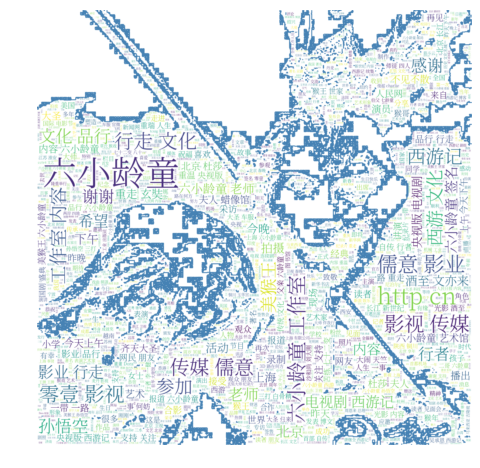

In [30]:
from wordcloud import WordCloud, ImageColorGenerator
image_colors_default = ImageColorGenerator(bg_mask)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### 微博时间

In [31]:
data['date'],data['time'] = zip(*data['publish_time'].map(lambda s:s.split()))

In [32]:
data['yy'],data['MM'],data['dd'] = zip(*data['date'].map(lambda s:s.split('-')))
data['hh'],data['mm']= zip(*data['time'].map(lambda s:s.split(':')))

#### 每月微博计数

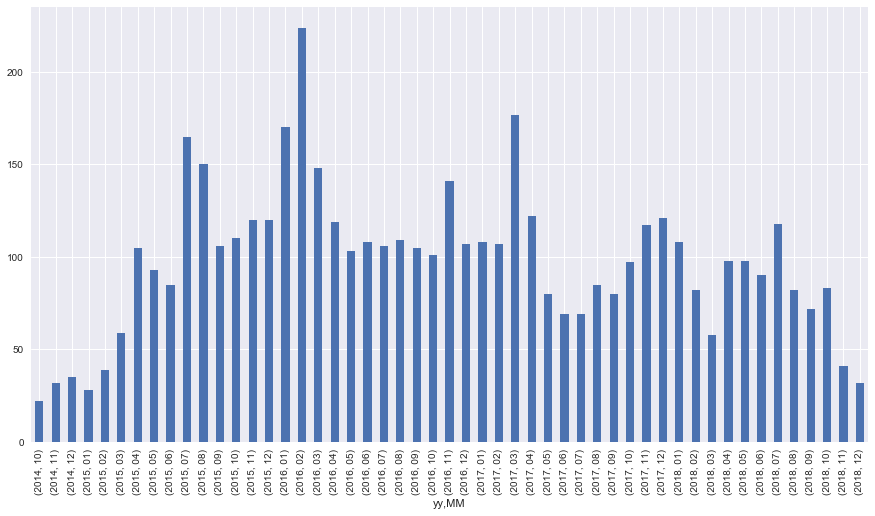

In [33]:
data.groupby(['yy','MM']).MM.count().plot.bar()
plt.show()

#### 每日微博计数

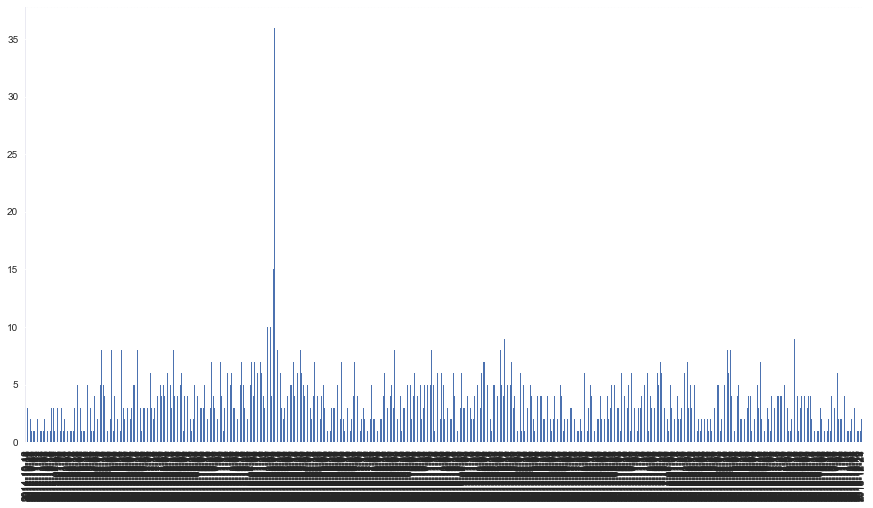

In [34]:
data.date.value_counts().sort_index().plot.bar()
plt.show()

In [35]:
tday = data.date.value_counts()[:5]
print(tday)
data[data.date==tday.index[0]]

2016-02-08    36
2016-02-06    15
2016-02-11    15
2016-02-09    14
2015-07-24    14
Name: date, dtype: int64


,id,weibo_content,weibo_place,publish_time,publish_tool,up_num,retweet_num,comment_num,date,time,yy,MM,dd,hh,mm
3472,3472,#北京台春晚#继续精彩。北京春晚火爆 大圣终于归来,无,2016-02-08 21:36,iPhone 5s,55378,890,5872,2016-02-08,21:36,2016,02,08,21,36
3473,3473,@北京杜莎夫人蜡像馆 北京杜莎夫人蜡像馆携手美猴王，祝你猴年快乐！,无,2016-02-08 21:11,微博 weibo.com,36066,352,1126,2016-02-08,21:11,2016,02,08,21,11
3474,3474,春节期间我的节目预告：六小龄童春节期间节目预告,无,2016-02-08 20:12,微博 weibo.com,26440,875,1570,2016-02-08,20:12,2016,02,08,20,12
3475,3475,静待北京卫视19：35，关注#北京台春晚#，整场晚会都有大圣陪伴你。[嘻嘻][嘻嘻],无,2016-02-08 19:09,iPhone 5s,44012,1447,4298,2016-02-08,19:09,2016,02,08,19,09
3476,3476,@北京卫视 春晚倒计时北京卫视春晚节目单公布 六小龄童贯穿全场,无,2016-02-08 18:23,iPhone 5s,52387,920,1853,2016-02-08,18:23,2016,02,08,18,23
3477,3477,丙申火猴年的第一天，晚餐属于二个人的世界，美中不足的是爱女妞妞远在大洋彼岸。愿大家猴年吉祥，...,无,2016-02-08 18:18,iPhone 5s,81925,429,3029,2016-02-08,18:18,2016,02,08,18,18
3478,3478,[嘻嘻][嘻嘻],无,2016-02-08 17:47,iPhone 5s,70509,1159,1953,2016-02-08,17:47,2016,02,08,17,47
3479,3479,时间快到了，今天没有办法回复所有朋友的问题，但是我都有看到，感谢大家的支持。祝大家猴年行大运...,无,2016-02-08 16:33,360安全浏览器,128978,1655,4677,2016-02-08,16:33,2016,02,08,16,33
3480,3480,转发微博已被删除,无,2016-02-08 16:25,360安全浏览器,30567,172,725,2016-02-08,16:25,2016,02,08,16,25
3481,3481,转发理由:我肯定会看的。我现在开始就已经在为看春晚做准备了。\n原始用户: 恍然如梦4562...,无,2016-02-08 16:16,360安全浏览器,22422,59,404,2016-02-08,16:16,2016,02,08,16,16


#### 年度微博计数

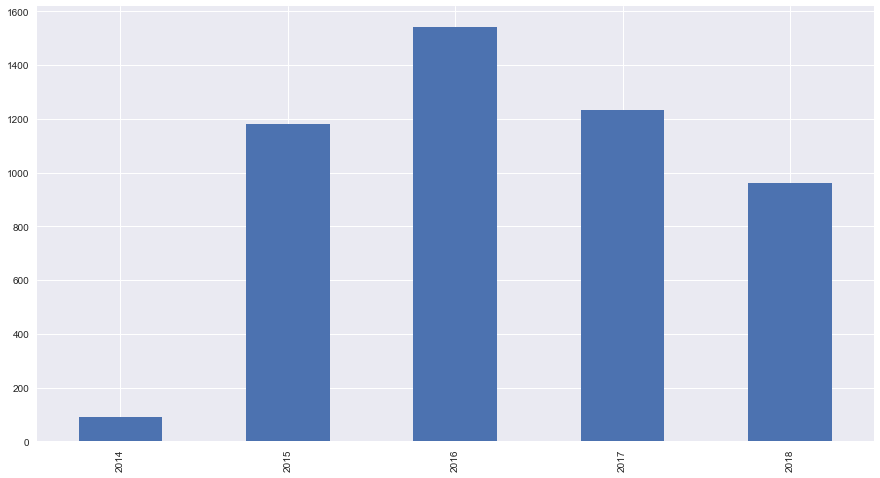

In [36]:
data.yy.value_counts().sort_index().plot.bar()
plt.show()

#### 月度微博计数

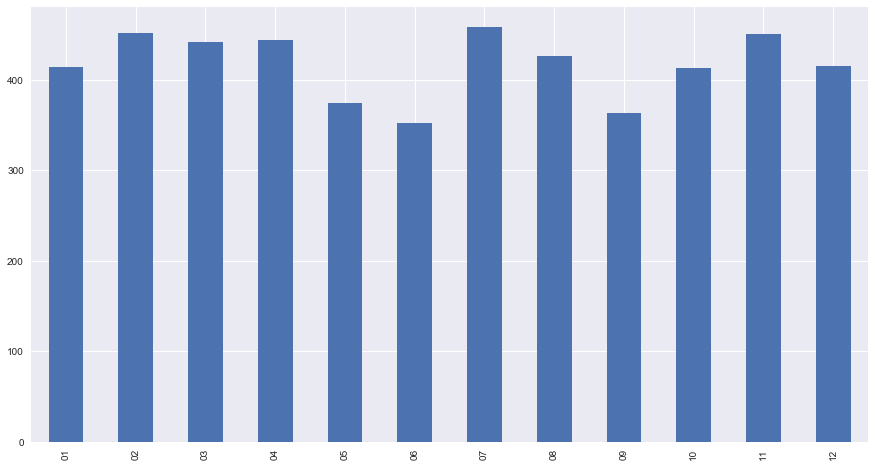

In [37]:
data.MM.value_counts().sort_index().plot.bar()
plt.show()

#### 日期微博统计

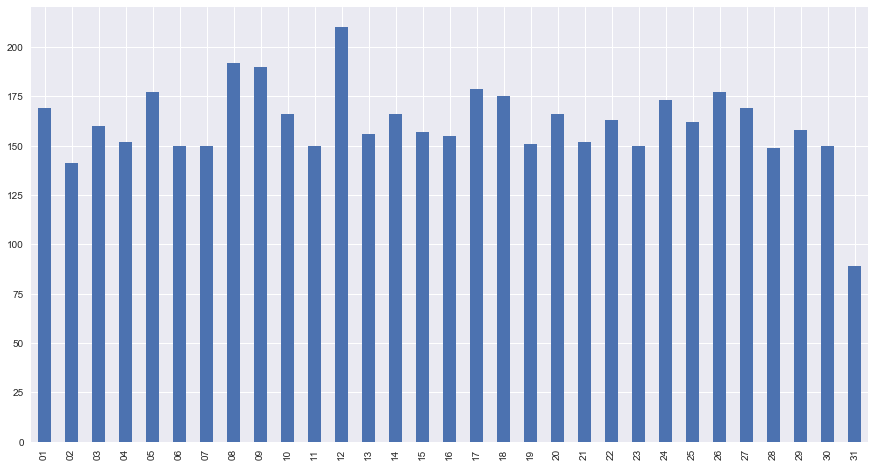

In [38]:
data.dd.value_counts().sort_index().plot.bar()
plt.show()

#### 偏爱发微博时间

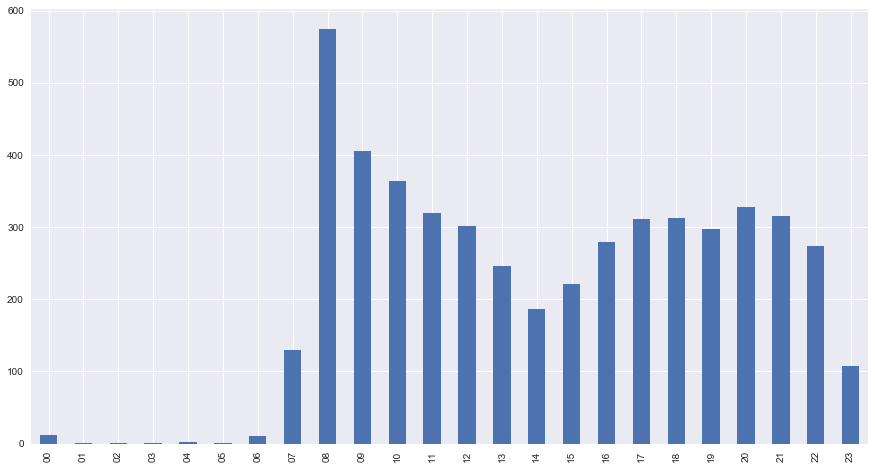

In [39]:
data.hh.value_counts().sort_index().plot.bar()
plt.show()

#### 分钟计数
整点效应。此处应该@何润东，大概8点20分发。

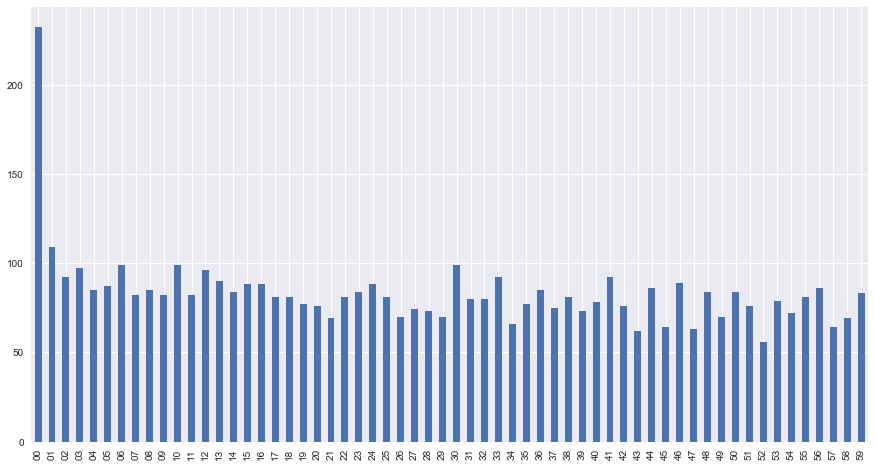

In [40]:
data.mm.value_counts().sort_index().plot.bar()
plt.show()